# Week 2 Building Types - Han Zhang

---

### Summary
This notebook examines how the building composition in the Chicago Energy benchmarking dataset changes over the years.

In [1]:
# Standard library imports

import matplotlib.pyplot as plt

# Third-party imports
import seaborn as sns

# Local application imports
from utils.data_utils import concurrent_buildings

# Load in the data
energy_df = concurrent_buildings()

energy_df.head()

,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Reporting Status,Chicago Energy Rating,Exempt From Chicago Energy Rating,Water Use (kGal),Row_ID
24486,2016,116336,lasalle private residences,1212 N LaSalle,60610,near north side,multifamily housing,367627.0,1986.0,1.0,...,2575.3,7.0,41.904201,-87.633825,point (-87.63382507 41.90420084),nan,NaN,nan,NaN,nan
24496,2016,101745,161 north clark,161 North Clark,60601,loop,office,1200836.0,1992.0,1.0,...,15498.4,12.9,41.884905,-87.630518,point (-87.6305179 41.88490511),nan,NaN,nan,NaN,nan
24495,2016,101448,1401 w roosevelt - 2017 resubmit,1401 W. Roosevelt,60608,near west side,multifamily housing,69385.0,2006.0,1.0,...,242.4,3.5,41.849153,-87.670896,point (-87.67089596 41.84915346),nan,NaN,nan,NaN,nan
24494,2016,159892,promontory corporation,5530-5532 S Shore Drive,60637,hyde park,multifamily housing,180351.0,1949.0,1.0,...,1317.3,7.3,41.794687,-87.580465,point (-87.58046479 41.794687),nan,NaN,nan,NaN,nan
24493,2016,103602,190 south lasalle,190 South LaSalle,60603,loop,office,882560.0,1985.0,1.0,...,11519.9,13.1,41.879756,-87.632687,point (-87.63268685 41.8797561),nan,NaN,nan,NaN,nan


In [2]:
variables = [
    "ENERGY STAR Score",
    "Electricity Use (kBtu)",
    "Natural Gas Use (kBtu)",
    "District Steam Use (kBtu)",
    "District Chilled Water Use (kBtu)",
    "All Other Fuel Use (kBtu)",
    "Site EUI (kBtu/sq ft)",
    "Source EUI (kBtu/sq ft)",
    "Weather Normalized Site EUI (kBtu/sq ft)",
    "Weather Normalized Source EUI (kBtu/sq ft)",
    "Total GHG Emissions (Metric Tons CO2e)",
    "GHG Intensity (kg CO2e/sq ft)",
]

efficiency_trends = (
    energy_df.groupby(["Data Year", "Primary Property Type"])[variables]
    .mean()
    .reset_index()
)

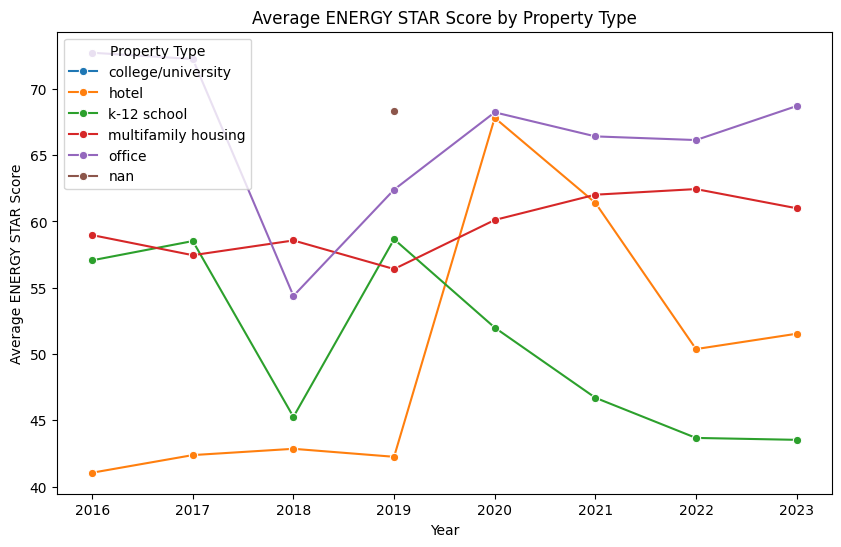

In [3]:
top_types = energy_df["Primary Property Type"].value_counts().nlargest(6).index

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=efficiency_trends[efficiency_trends["Primary Property Type"].isin(top_types)],
    x="Data Year",
    y="ENERGY STAR Score",
    hue="Primary Property Type",
    marker="o",
)
plt.title("Average ENERGY STAR Score by Property Type")
plt.ylabel("Average ENERGY STAR Score")
plt.xlabel("Year")
plt.legend(title="Property Type")
plt.show()

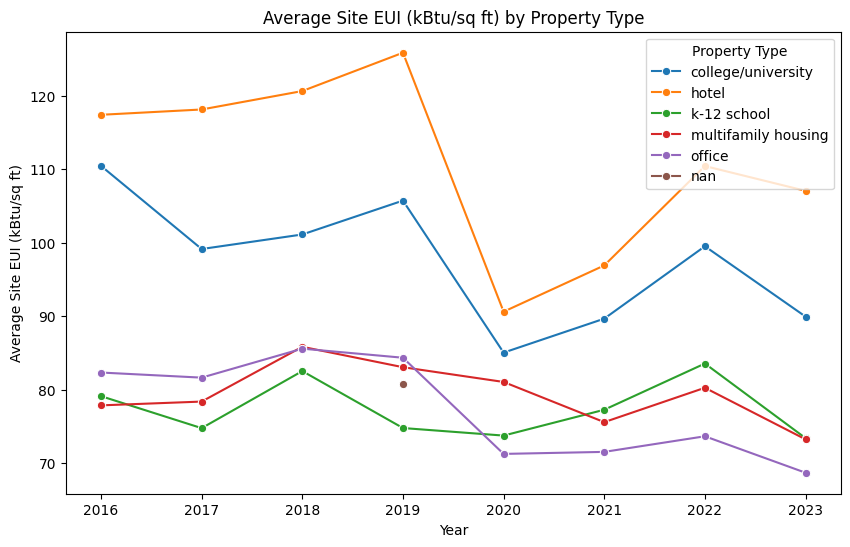

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=efficiency_trends[efficiency_trends["Primary Property Type"].isin(top_types)],
    x="Data Year",
    y="Site EUI (kBtu/sq ft)",
    hue="Primary Property Type",
    marker="o",
)
plt.title("Average Site EUI (kBtu/sq ft) by Property Type")
plt.ylabel("Average Site EUI (kBtu/sq ft)")
plt.xlabel("Year")
plt.legend(title="Property Type")
plt.show()

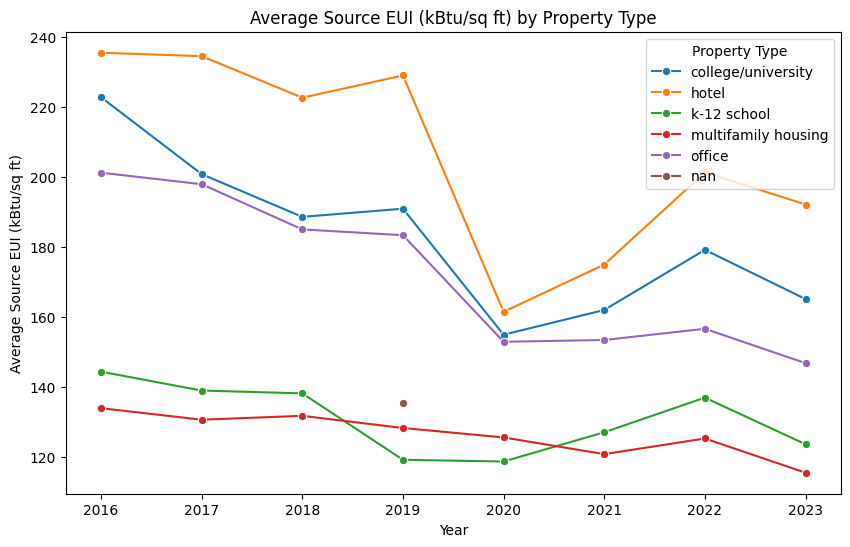

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=efficiency_trends[efficiency_trends["Primary Property Type"].isin(top_types)],
    x="Data Year",
    y="Source EUI (kBtu/sq ft)",
    hue="Primary Property Type",
    marker="o",
)
plt.title("Average Source EUI (kBtu/sq ft) by Property Type")
plt.ylabel("Average Source EUI (kBtu/sq ft)")
plt.xlabel("Year")
plt.legend(title="Property Type")
plt.show()

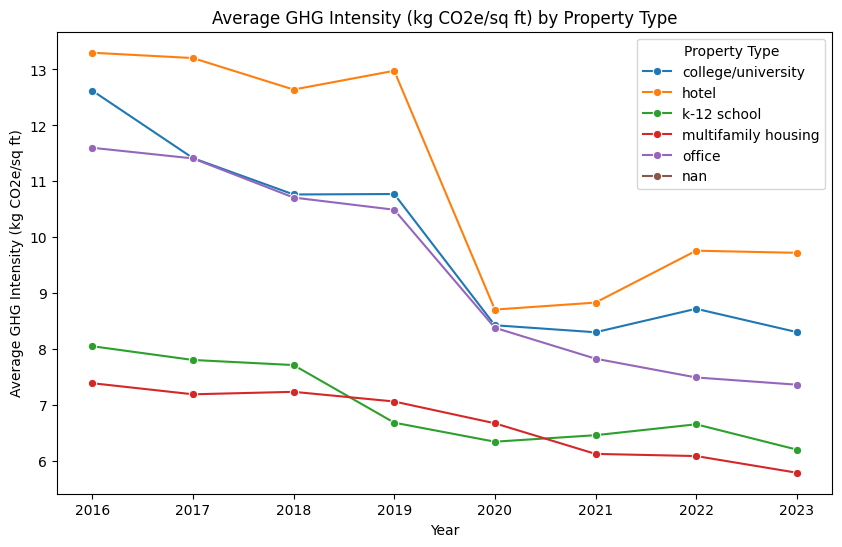

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=efficiency_trends[efficiency_trends["Primary Property Type"].isin(top_types)],
    x="Data Year",
    y="GHG Intensity (kg CO2e/sq ft)",
    hue="Primary Property Type",
    marker="o",
)
plt.title("Average GHG Intensity (kg CO2e/sq ft) by Property Type")
plt.ylabel("Average GHG Intensity (kg CO2e/sq ft)")
plt.xlabel("Year")
plt.legend(title="Property Type")
plt.show()

### Conclusions

We generally see improvements in efficiency over time. One interesting thing to note is the spike in 2019 for `College/University` and `Hotel`. We also see a smaller spike in 2015 for `Retail Store` which could be worth looking into.

For further analyses, it may be worth it to exclude `College/University` and `Hotel` from year to year analyses as the outlier of Covid could skew our results.

# Update Note
After slimming down our dataset to include only concurrent buildings that are seen from 2016-2023, we no longer see as much of a spike in 2019 for `College/University` and `Hotel`.